In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [8]:
df = pd.read_csv('insurance.csv')
insurance_df = pd.DataFrame(df)
print(insurance_df.head())

    age     sex     bmi  children smoker     region       charges
0  19.0  female  27.900       0.0    yes  southwest     16884.924
1  18.0    male  33.770       1.0     no  Southeast     1725.5523
2  28.0    male  33.000       3.0     no  southeast     $4449.462
3  33.0    male  22.705       0.0     no  northwest  $21984.47061
4  32.0    male  28.880       0.0     no  northwest    $3866.8552


In [9]:
insurance_filled = insurance_df
insurance_filled.dropna(inplace=True)

insurance_filled['region'] = insurance_filled['region'].str.lower()
FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

In [13]:
# create one-hot columns for region
insurance_df = pd.get_dummies(df, prefix='region', columns=['region'])

In [14]:
# drop a specific dummy column if present
if 'region_southwest' in insurance_df.columns:
    insurance_df = insurance_df.drop(columns=['region_southwest'])

In [15]:
# ensure smoker is 0/1 (handles "yes"/"no" strings and numeric already)
if insurance_df['smoker'].dtype == object:
    insurance_df['smoker'] = insurance_df['smoker'].map({'yes': 1, 'no': 0})

insurance_df['smoker'] = insurance_df['smoker'].astype('bool')


In [19]:
insurance_filled = insurance.dropna()


insurance_filled['region'] = insurance_filled['region'].str.lower()

FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

insurance_filled['sex'].unique()

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)

insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype(float)

insurance_filled.sample(10)



C:\Users\kiman\AppData\Local\Temp\ipykernel_24944\2812306226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()
C:\Users\kiman\AppData\Local\Temp\ipykernel_24944\2812306226.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
C:\Users\kiman\AppData\Local\Temp\ipykernel_24944\2812306226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,age,sex,bmi,children,smoker,region,charges
1235,26.0,male,31.065,0.0,False,northwest,2699.56835
165,47.0,male,28.215,4.0,False,northeast,10407.08585
660,37.0,male,46.530,3.0,False,southeast,6435.62370
366,56.0,female,32.300,3.0,False,northeast,13430.26500
750,-37.0,female,26.400,0.0,True,southeast,19539.24300
273,50.0,male,27.455,1.0,False,northeast,9617.66245
116,58.0,male,49.060,0.0,False,southeast,11381.32540
611,38.0,female,34.800,2.0,False,southwest,6571.54400
1016,19.0,female,24.605,1.0,False,northwest,2709.24395
389,24.0,female,30.210,3.0,False,northwest,4618.07990


# Scatterplots of relationships between variables & charges

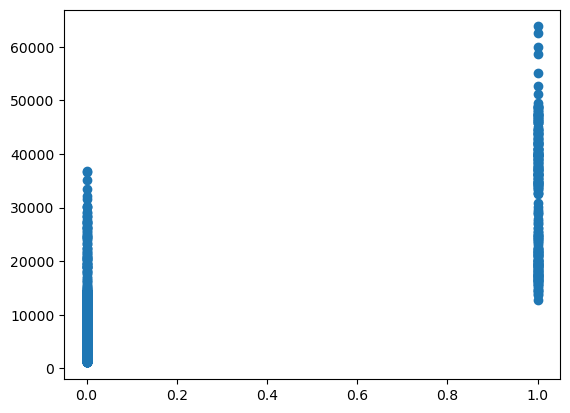

In [21]:
df = insurance_filled.copy()

plt.scatter(df['smoker'], df['charges'])

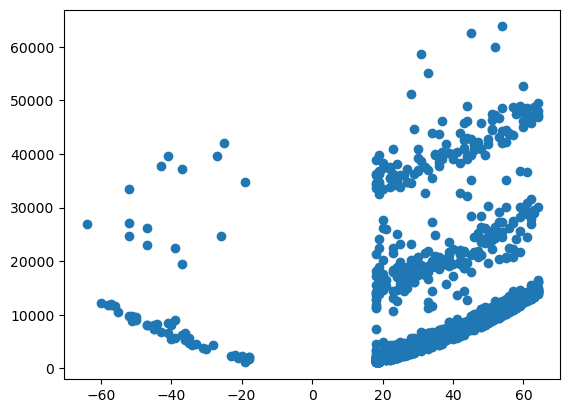

In [22]:
df = insurance_filled.copy()

plt.scatter(df['age'], df['charges'])

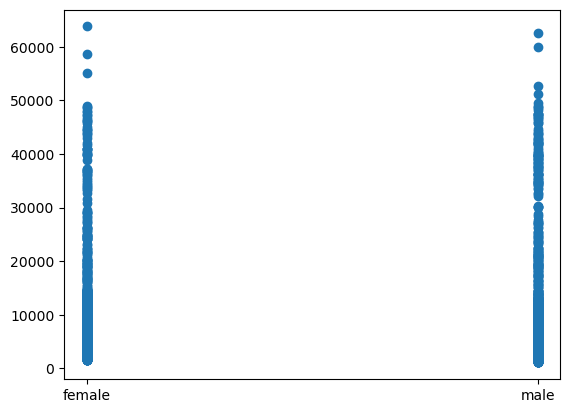

In [23]:
df = insurance_filled.copy()

plt.scatter(df['sex'], df['charges'])

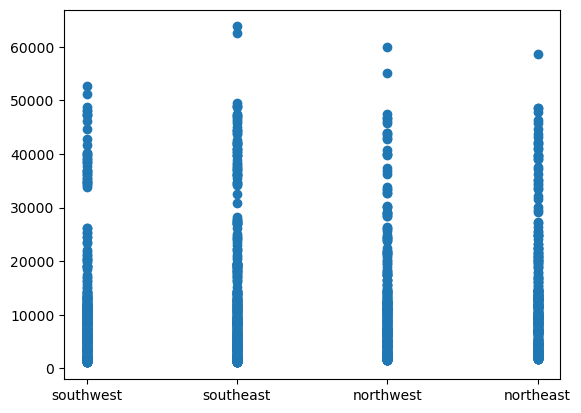

In [24]:
df = insurance_filled.copy()

plt.scatter(df['region'], df['charges'])

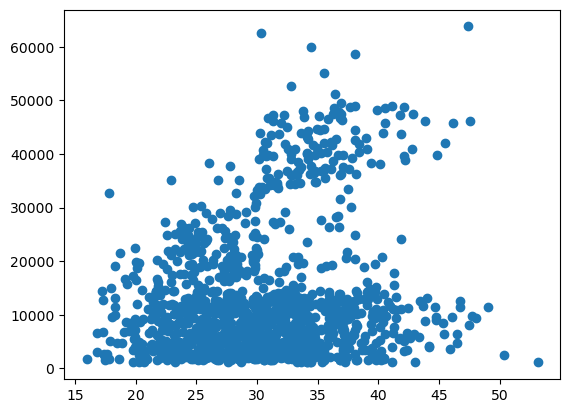

In [25]:
df = insurance_filled.copy()

plt.scatter(df['bmi'], df['charges'])

# Preparing for a model fitting

In [30]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])

df_new

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,female,27.900,0.0,True,16884.92400,False,False,False,True
1,18.0,male,33.770,1.0,False,1725.55230,False,False,True,False
2,28.0,male,33.000,3.0,False,4449.46200,False,False,True,False
3,33.0,male,22.705,0.0,False,21984.47061,False,True,False,False
4,32.0,male,28.880,0.0,False,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,False,10600.54830,False,True,False,False
1334,-18.0,female,31.920,0.0,False,2205.98080,True,False,False,False
1335,18.0,female,36.850,0.0,False,1629.83350,False,False,True,False
1336,21.0,female,25.800,0.0,False,2007.94500,False,False,False,True


In [32]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])

df_new = df_new.drop(columns=['region_southeast'])


df_new

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,True,16884.92400,False,False,True
1,18.0,male,33.770,1.0,False,1725.55230,False,False,False
2,28.0,male,33.000,3.0,False,4449.46200,False,False,False
3,33.0,male,22.705,0.0,False,21984.47061,False,True,False
4,32.0,male,28.880,0.0,False,3866.85520,False,True,False
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,False,10600.54830,False,True,False
1334,-18.0,female,31.920,0.0,False,2205.98080,True,False,False
1335,18.0,female,36.850,0.0,False,1629.83350,False,False,False
1336,21.0,female,25.800,0.0,False,2007.94500,False,False,True


In [33]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')


df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,1,16884.92400,False,False,True
1,18.0,male,33.770,1.0,0,1725.55230,False,False,False
2,28.0,male,33.000,3.0,0,4449.46200,False,False,False
3,33.0,male,22.705,0.0,0,21984.47061,False,True,False
4,32.0,male,28.880,0.0,0,3866.85520,False,True,False


In [40]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')


df_new['is_male'] =(df_new['sex']== 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna()
df_new.head()
                                                   
                                                   

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


# Linear Regression

In [57]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Assume df_new is already loaded
# Example: df_new = pd.read_csv("insurance.csv")

# 2. Separate input (X) and target (y)
X = df_new.drop(columns=["charges"])  # all features except 'charges'
y = df_new["charges"]                 # target column

print(y.info())

# 3. Handle categorical variables (if any)
# Convert categorical columns to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# 4. Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# 8. (Optional) View model coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients.sort_values(by="Coefficient", ascending=False))


<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None
Model Performance:
Mean Absolute Error (MAE): 5112.25
Mean Squared Error (MSE): 45146075.58
R² Score: 0.67
            Feature   Coefficient
3            smoker  24017.432085
4  region_northeast    902.583740
5  region_northwest    696.107236
2          children    381.097583
6  region_southwest    372.082564
1               bmi    362.401144
0               age     97.426106
7           is_male   -315.228771


In [58]:
val_df = pd.read_csv('validation_dataset.csv')

val_df.sample(10)

,age,sex,bmi,children,smoker,region
47,19.0,male,44.880000,0.0,yes,southeast
16,83.0,male,89.097296,9.0,no,northwest
15,18.0,male,30.400000,3.0,no,northeast
3,71.0,male,65.502135,13.0,yes,southeast
46,92.0,male,84.973279,11.0,yes,southwest
6,29.0,female,32.110000,2.0,no,northwest
31,19.0,female,33.110000,0.0,yes,southeast
23,47.0,female,36.000000,1.0,no,southwest
34,43.0,female,24.700000,2.0,yes,northwest
5,70.0,female,72.958351,11.0,yes,southeast


In [60]:
def prework_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])


    df_new['smoker'] = (df_new['smoker']== 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])
                     
    return df_new     

In [62]:
val_df = pd.read_csv('validation_dataset.csv')
input_df = prework_df(val_df)

predictions = model.predict(input_df)

predictions

array([ 4181.92525152, 31292.33359454, 30213.6157218 , 52628.68836496,
        9522.6039366 , 54786.43680756,  9237.27440747, 13668.71924489,
       11944.29635776, 12481.24534809,  4529.26040383, 13033.19794862,
        8052.18060935,  9643.19762732,  6462.11670474,  7818.22660418,
       37502.99952961, 56303.61733671, 54101.65547461,  9149.04011986,
        2720.930512  , 11839.8384373 , 34121.62766209, 11695.56250525,
       10062.58901546,  9003.93852718, 54121.60635127,  5766.87724582,
        8960.60284199, 10351.95889112,  8971.08544363, 31184.54417866,
       30237.96341219,  9653.02409552, 31933.27949345, 13573.53488773,
       53559.16114824, 13190.80481922,  3410.64741986, 25600.35262939,
       32683.1565036 , 13229.5226341 ,  6056.4361817 , 53583.05550584,
        8592.85867521, 37520.66832728, 61340.88881846, 35134.77687295,
       12138.09642044, 35414.08248294])

In [68]:
val_df = pd.read_csv('validation_dataset.csv')
input_df = prework_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges']< 1000, 'predicted_charges'] = 1000


validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,4181.925252
1,39.0,male,26.410000,0.0,yes,northeast,31292.333595
2,27.0,male,29.150000,0.0,yes,southeast,30213.615722
3,71.0,male,65.502135,13.0,yes,southeast,52628.688365
4,28.0,male,38.060000,0.0,no,southeast,9522.603937
5,70.0,female,72.958351,11.0,yes,southeast,54786.436808
6,29.0,female,32.110000,2.0,no,northwest,9237.274407
7,42.0,female,41.325000,1.0,no,northeast,13668.719245
8,48.0,female,36.575000,0.0,no,northwest,11944.296358
9,63.0,male,33.660000,3.0,no,southeast,12481.245348
